94.8487590940887

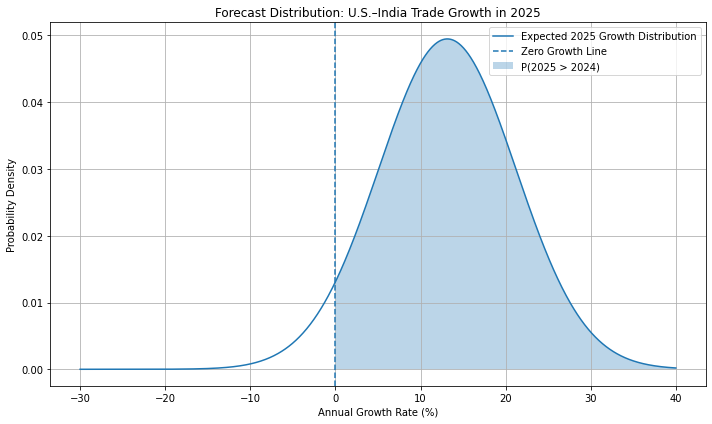

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# -----------------------------
# U.S.–India goods trade (billions USD), 2010–2024
# Source: U.S. Census, "Trade in Goods with India"
# https://www.census.gov/foreign-trade/balance/c5330.html
# -----------------------------
data = {
    "Year": list(range(2010, 2025)),
    "Exports": [
        19.2489, 21.5422, 22.1057, 21.8104, 21.4991,
        21.4529, 21.6472, 25.6478, 33.1766, 34.2228,
        27.0817, 39.8174, 46.8192, 40.3175, 41.5370
    ],
    "Imports": [
        29.5329, 36.1545, 40.5126, 41.8100, 45.3580,
        44.7827, 46.0242, 48.5494, 54.2496, 57.8790,
        51.2546, 73.3082, 85.5174, 83.5571, 87.3381
    ],
}

df = pd.DataFrame(data)
df["Total_Trade"] = df["Exports"] + df["Imports"]

# YoY growth (%)
df["Growth"] = df["Total_Trade"].pct_change() * 100
mean_growth = df["Growth"].iloc[1:].mean()
std_growth  = df["Growth"].iloc[1:].std()

# -----------------------------
# 2025 partial-year info (billions USD)
# Jan–May totals computed from monthly lines on the same Census page
# Jan–May 2024: exports 16.8666, imports 37.5276 => total 54.3942
# Jan–May 2025: exports 18.2464, imports 47.1526 => total 65.3990
# 2024 full-year total needed for weighting: 41.5370 + 87.3381 = 128.8751
# -----------------------------
jan_may_2024 = 54.3942
jan_may_2025 = 65.3990
total_2024   = 128.8751

# Weight: how much of 2024 occurred by May (same idea as your China run)
w1 = jan_may_2024 / total_2024   # ~0.4221
w2 = 1 - w1

# Known part of 2025 growth (Jan–May YoY), blended with historical mean for the rest
known_growth = (jan_may_2025 - jan_may_2024) / jan_may_2024 * 100
expected_annual_growth = w1 * known_growth + w2 * mean_growth
expected_sd = w2 * std_growth

# Probability that 2025 total trade > 2024 total trade (i.e., growth > 0)
z_score = (0 - expected_annual_growth) / expected_sd
probability = 1 - norm.cdf(z_score)

# Plot
x = np.linspace(-30, 40, 1000)
pdf = norm.pdf(x, expected_annual_growth, expected_sd)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label="Expected 2025 Growth Distribution")
plt.axvline(0, linestyle='--', label='Zero Growth Line')
plt.fill_between(x, pdf, where=(x > 0), alpha=0.3, label='P(2025 > 2024)')
plt.title("Forecast Distribution: U.S.–India Trade Growth in 2025")
plt.xlabel("Annual Growth Rate (%)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.tight_layout()

probability * 100